# Analysis
Of the 249 mice studied, 50.74 of the mice are male and the rest are female.
Of the proven drug regimens "ramicane" proved to be the most effective in reducing tumor growth followed by "capomulin"
The g288 mouse was chosen to analyze the tumor growth for 45 days and the results indicate that the drug caomulin helped to slow the growth of the tumor.
It is observed that there is a relationship between the volume of the tumor and the weight of the mouse.

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")


# Display the data table for preview
combined_data.head()

In [43]:
# Checking the number of mice.

len(combined_data["Mouse ID"].value_counts())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_tp = combined_data[combined_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
duplicate_tp


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_data.loc[combined_data["Mouse ID"] != "g989"]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice in the clean DataFrame.
total_mouse = clean_df["Mouse ID"].unique()
len(total_mouse)


248

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
drug_group = clean_df.groupby(["Drug Regimen"])

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_tumor = drug_group["Tumor Volume (mm3)"].mean()
median_tumor = drug_group["Tumor Volume (mm3)"].median()
var_tumor = drug_group["Tumor Volume (mm3)"].var()
std_tumor = drug_group["Tumor Volume (mm3)"].std()
sem_tumor = drug_group["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.
drug_df = pd.DataFrame({"Mean": mean_tumor,
                        "Median":median_tumor,
                        "Variance": var_tumor,
                        "Standard Deviation":std_tumor,
                        "SEM":sem_tumor})
drug_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [91]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

drug_byaggregation = round(clean_df.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].agg(["mean","median","var","std","sem"]),2)
drug_byaggregation

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

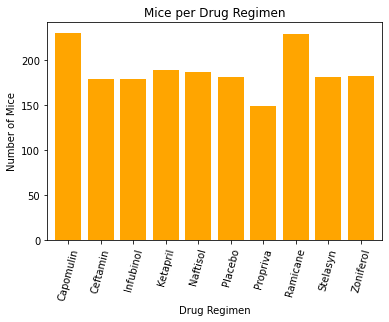

In [74]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_regimen = drug_group["Drug Regimen"].count()


drug_plot = drug_regimen.plot(kind='bar', rot=75, color = "orange", title="Mice per Drug Regimen", width= .8)

drug_plot.set_xlabel("Drug Regimen")
drug_plot.set_ylabel("Number of Mice")
plt.show()

[0 1 2 3 4 5 6 7 8 9]
['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']


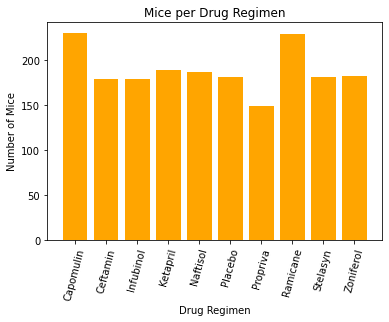

In [75]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis = np.arange(len(drug_regimen))
print(x_axis)
plt.bar(x_axis, drug_regimen, width=.8, color="orange")

drug_names = list(drug_regimen.index.values)
print(drug_names)
labels = [value for value in x_axis]
plt.xticks(labels, drug_names, rotation=75)

plt.title("Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

plt.show()

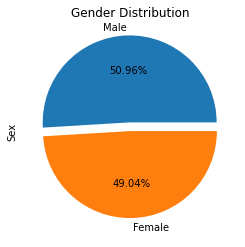

In [87]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_count = clean_df["Sex"].value_counts()
gender_plot = gender_count.plot(kind='pie', autopct="%1.2f%%", title="Gender Distribution", explode=(0.1, 0))

Text(0.5, 1.0, 'Gender Distribution')

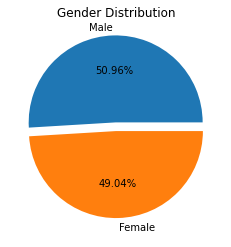

In [86]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_count, explode=(0.1, 0), autopct="%1.2f%%", labels=gender_count.index.values)
plt.title("Gender Distribution")

## Quartiles, Outliers and Boxplots

In [125]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_df.groupby(["Mouse ID"])["Timepoint"].max()
last_timepoint
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_df = pd.merge(last_timepoint, clean_df, on=(["Mouse ID","Timepoint"]))
merge_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [163]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
# Determine outliers using upper and lower bounds

#loops through all four treatements and prints their outliers
for treatment in treatments:
    tumor = merge_df.loc[merge_df['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    tumor_vol.append(tumor)
    
    quartiles = tumor.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq


    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"For {treatment} values below {lower_bound} and above {upper_bound} could be outliers")


    
    outlier_tumor = tumor.loc[(tumor < lower_bound) 
                              | (tumor> upper_bound)].count()
    
    print(f"Outliers for {treatment} are  {outlier_tumor}.")
    

For Capomulin values below 20.70456164999999 and above 51.83201549 could be outliers
Outliers for Capomulin are  0.
For Ramicane values below 17.912664470000003 and above 54.30681135 could be outliers
Outliers for Ramicane are  0.
For Infubinol values below 36.83290494999999 and above 82.74144559000001 could be outliers
Outliers for Infubinol are  1.
For Ceftamin values below 25.355449580000002 and above 87.66645829999999 could be outliers
Outliers for Ceftamin are  0.


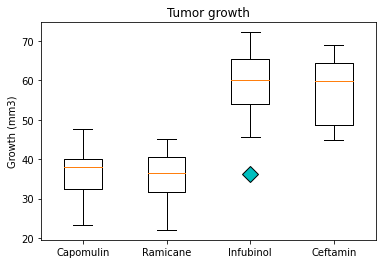

In [164]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

filerprops = dict(markerfacecolor='c', marker='D',
                  markersize=12, linestyle='none')
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor growth')
ax1.set_ylabel('Growth (mm3)')

ax1.boxplot(tumor_vol,  labels = treatments, flierprops=filerprops)

plt.show()


In [166]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_mice = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
capomulin_mice.value_counts("Mouse ID")

Mouse ID
y793    10
x401    10
b742    10
g288    10
g316    10
i557    10
i738    10
j119    10
l509    10
l897    10
m601    10
m957    10
r554    10
r944    10
s185    10
s710    10
t565    10
u364    10
v923    10
w914    10
b128    10
j246     8
f966     5
r157     4
w150     3
dtype: int64

In [191]:
#Mouse g288
mouse_g288 = clean_df.loc[clean_df["Mouse ID"] == "g288"]
mouse_g288

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
235,g288,Capomulin,Male,3,19,0,45.000000,0
236,g288,Capomulin,Male,3,19,5,45.839400,0
237,g288,Capomulin,Male,3,19,10,46.304003,1
238,g288,Capomulin,Male,3,19,15,42.172301,1
239,g288,Capomulin,Male,3,19,20,42.957120,1
240,g288,Capomulin,Male,3,19,25,42.368692,1
241,g288,Capomulin,Male,3,19,30,42.874461,1
242,g288,Capomulin,Male,3,19,35,38.954115,1
243,g288,Capomulin,Male,3,19,40,36.356851,1
244,g288,Capomulin,Male,3,19,45,37.074024,1


Text(0, 0.5, 'Tumor Volume (mm3)')

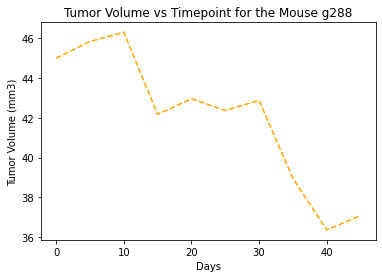

In [172]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
tumor_y = mouse_g288["Tumor Volume (mm3)"]
time_x = mouse_g288["Timepoint"]

plt.plot(time_x, tumor_y, color="orange", label="Tumor volume", linestyle = "dashed")
plt.title("Tumor Volume vs Timepoint for the Mouse g288")
plt.xlabel("Days")
plt.ylabel("Tumor Volume (mm3)")

Text(0, 0.5, 'Tumor volume (mm3)')

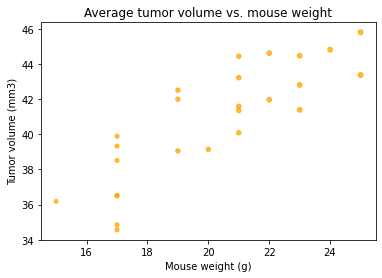

In [180]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_groupby =capomulin_mice.groupby(["Mouse ID"]).mean()
cap_groupby.head()

avg_tumor_vol = cap_groupby["Weight (g)"]
avg_weight = cap_groupby["Tumor Volume (mm3)"]

plt.scatter(avg_tumor_vol, avg_weight, marker="o", facecolors="orange", s=avg_tumor_vol, alpha=0.75) 
plt.title( "Average tumor volume vs. mouse weight")
plt.xlabel("Mouse weight (g)")
plt.ylabel("Tumor volume (mm3)")

The correlation between both factors is 0.84
The r-squared is: 0.7088568047708717
y = 0.95x + 21.55


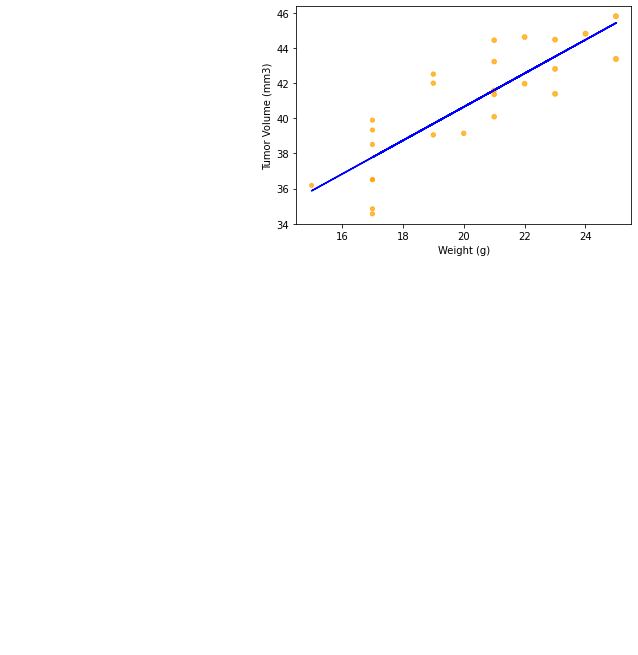

In [190]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(avg_tumor_vol,avg_weight)
(slope, intercept, rvalue, pvalue, stderr) = linregress(avg_tumor_vol, avg_weight)
regress_values = avg_tumor_vol * slope + intercept

plt.scatter(avg_tumor_vol, avg_weight, marker="o", facecolors="orange", edgecolors="orange",
            s=avg_tumor_vol, alpha=0.75)
plt.plot(avg_tumor_vol,regress_values,"b-")

plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
line_graph = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_graph,(5,10),color="orange")

print(f"The correlation between both factors is {round(correlation[0],2)}")
print(f"The r-squared is: {rvalue**2}")

print(line_graph)